<a href="https://colab.research.google.com/github/YFHcode/Data_Analysis/blob/main/vgsales_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# On import les librairies utilises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# On import notre DataSet

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/vgsales.csv')
df.head

<bound method NDFrame.head of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales

In [6]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# df shape 

In [7]:
df.shape

(16598, 11)

In [8]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [9]:
df.dtypes

Rank                     int64
Name                    object
Platform                object
Year            datetime64[ns]
Genre                   object
Publisher               object
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object

# On verifie s'il y a des valeurs vides

In [10]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
df.dropna(subset=['Publisher'], inplace=True)
df['Year'].fillna(df['Year'].quantile(0.50),inplace=True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
df.shape

(16540, 11)

# 1. Which region has performed the best in terms of sales? 

In [13]:
x=(df['NA_Sales'].mean())*1000000  #Resultat en millions
y=(df['EU_Sales'].mean())*1000000
z=(df['JP_Sales'].mean())*1000000
q=(df['Other_Sales'].mean())*1000000
p=(df['Global_Sales'].mean())*1000000

In [14]:
print("The average sales in North America =", (f"${x:,.3f}")) 
print("The average sales in Europe =",(f"${y:,.3f}"))
print("The average sales in Japan =",(f"${z:,.3f}"))
print("The average sales in other regions =",(f"${q:,.3f}"))
print("The average sales globally =",(f"${p:,.3f}"))

The average sales in North America = $265,079.202
The average sales in Europe = $146,883.313
The average sales in Japan = $77,998.186
The average sales in other regions = $48,191.052
The average sales globally = $538,425.635


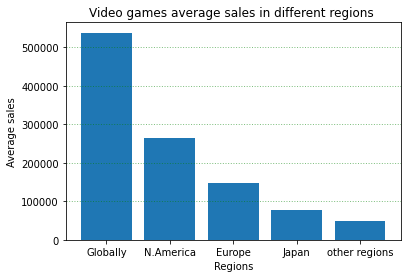

In [15]:
region=['Globally','N.America' , 'Europe' , 'Japan' , 'other regions']
avg_sales = [p,x,y,z,q]
plt.bar(region, avg_sales)
plt.grid(color='green', linestyle=':', linewidth=1.0, axis='y', alpha=0.5)
plt.ylabel('Average sales')  
plt.xlabel('Regions')           
plt.title('Video games average sales in different regions ')
plt.show()

# 2. Which Platform & Genre has performed the best in terms of sales? 

# Games by Platform : 

In [16]:
df['Platform'].value_counts()[0:10]

PS2     2159
DS      2156
PS3     1326
Wii     1324
X360    1261
PSP     1211
PS      1193
PC       954
XB       824
GBA      796
Name: Platform, dtype: int64

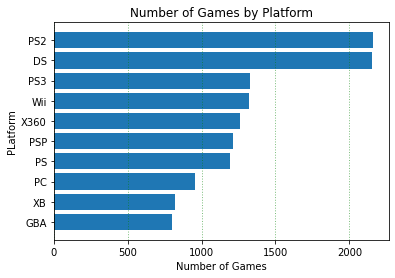

In [25]:
NumberofGames=[796, 821, 954, 1193, 1211, 1261, 1324, 1326, 2156, 2159]
Platform = ['GBA', 'XB', 'PC', 'PS', 'PSP', 'X360', 'Wii', 'PS3', 'DS', 'PS2']
plt.barh(Platform,NumberofGames)
plt.grid(color='green', linestyle=':', linewidth=1.0, axis='x', alpha=0.5)
plt.ylabel('PLatform')  
plt.xlabel('Number of Games')           
plt.title('Number of Games by Platform')
plt.show()

# Games by Genre :

In [47]:
df['Genre'].value_counts()[0:10]

Action          3309
Sports          2343
Misc            1712
Role-Playing    1486
Shooter         1308
Adventure       1282
Racing          1248
Platform         884
Simulation       863
Fighting         846
Name: Genre, dtype: int64

In [65]:
print(df['Genre'].value_counts()[0:10].tolist())
print(df['Genre'].value_counts()[0:10].index.tolist())


[3309, 2343, 1712, 1486, 1308, 1282, 1248, 884, 863, 846]
['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting']


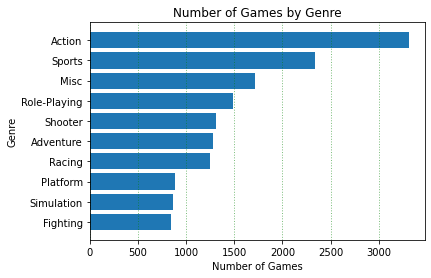

In [63]:
NumberofGames=df['Genre'].value_counts()[0:10].tolist()[::-1]
Genre = df['Genre'].value_counts()[0:10].index.tolist()[::-1]
plt.barh(Genre,NumberofGames)
plt.grid(color='green', linestyle=':', linewidth=1.0, axis='x', alpha=0.5)
plt.ylabel('Genre')  
plt.xlabel('Number of Games')           
plt.title('Number of Games by Genre')
plt.show()

## 2.1.1 Which Platform has performed the best in terms of sales in Globally?

In [88]:
data = pd.DataFrame(df.groupby("Platform")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
data.rename(columns = {'Platform':'Platform_Gb'}, inplace = True)
data[0:10]

,Platform_Gb,Global_Sales
0,PS2,1252.43
1,X360,979.89
2,PS3,957.29
3,Wii,926.36
4,DS,822.19
5,PS,729.07
6,GBA,310.29
7,PSP,296.10
8,PS4,278.10
9,PC,258.46


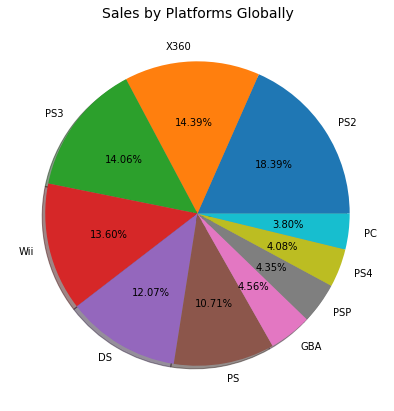

In [89]:
NA_Sales=[1252.43,979.89,957.29,926.36,822.19,729.07,310.29,296.10,278.10,258.46]
labels=['PS2','X360','PS3','Wii','DS','PS','GBA','PSP','PS4','PC']
plt.figure(figsize=(9, 7))
plt.pie(NA_Sales,labels=labels,shadow=True,autopct='%.2f%%')
plt.title('Sales by Platforms Globally', fontsize=14)
plt.show()

# 2.1.2 Which Genre has performed the best in terms of sales in Globally?

In [66]:
data0 = pd.DataFrame(df.groupby("Genre")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
data0.rename(columns = {'Genre':'Genre_Gb'}, inplace = True)
data0[0:10]

,Genre_Gb,Global_Sales
0,Action,1750.33
1,Sports,1329.35
2,Shooter,1037.32
3,Role-Playing,927.31
4,Platform,830.87
5,Misc,802.15
6,Racing,732.03
7,Fighting,445.70
8,Simulation,391.96
9,Puzzle,244.94


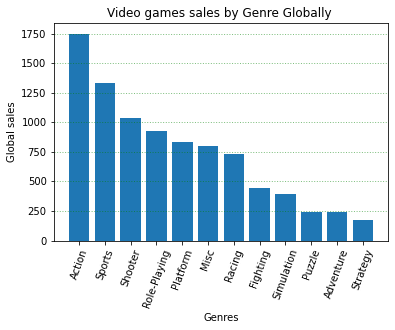

In [80]:
Genre_Gb=list(data0['Genre_Gb'])
Global_Sales = list(data0['Global_Sales'])
plt.bar(Genre_Gb,Global_Sales)
plt.grid(color='green', linestyle=':', linewidth=1.0, axis='y', alpha=0.5)
plt.xticks(rotation=70) 
plt.ylabel('Global sales')  
plt.xlabel('Genres')           
plt.title('Video games sales by Genre Globally ')
plt.show()

## 2.2.1 Which Platform has performed the best in terms of sales in North America?

In [ ]:
data1 = pd.DataFrame(df.groupby("Platform")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index())
data1.rename(columns = {'Platform':'Platform_NA'}, inplace = True)
data1[0:10]

,Platform_NA,NA_Sales
0,X360,601.04
1,PS2,582.17
2,Wii,507.56
3,PS3,392.26
4,DS,390.67
5,PS,335.65
6,XB,186.69
7,GBA,181.85
8,N64,139.02
9,GC,133.46


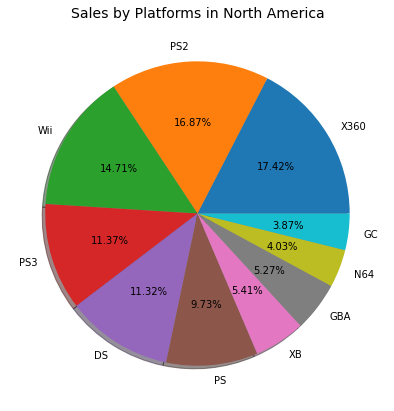

In [76]:
NA_Sales=[601.04, 582.17, 507.56, 392.26, 390.67, 335.65, 186.69, 181.85, 139.02, 133.46]
labels=['X360', 'PS2', 'Wii', 'PS3', 'DS', 'PS', 'XB', 'GBA', 'N64', 'GC']
plt.figure(figsize=(9, 7))
plt.pie(NA_Sales,labels=labels,shadow=True,autopct='%.2f%%')
plt.title('Sales by Platforms in North America', fontsize=14)
plt.show()

# 2.2.2 Which Genre has performed the best in terms of sales in North America?

In [92]:
data1 = pd.DataFrame(df.groupby("Genre")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index())
data1.rename(columns = {'Genre':'Genre_NA'}, inplace = True)
data1[0:10]

,Genre_NA,NA_Sales
0,Action,877.54
1,Sports,682.54
2,Shooter,582.59
3,Platform,447.05
4,Misc,404.67
5,Racing,359.42
6,Role-Playing,327.28
7,Fighting,221.92
8,Simulation,183.31
9,Puzzle,123.78


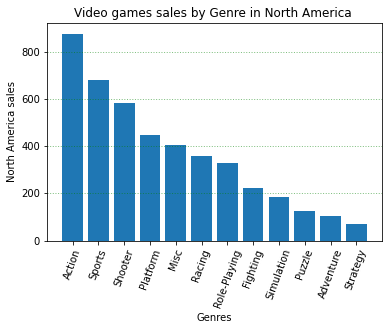

In [79]:
Genre_NA=list(data1['Genre_NA'])
NA_Sales = list(data1['NA_Sales'])
plt.bar(Genre_NA,NA_Sales)
plt.grid(color='green', linestyle=':', linewidth=1.0, axis='y', alpha=0.5)
plt.xticks(rotation=70) 
plt.ylabel('North America sales')  
plt.xlabel('Genres')           
plt.title('Video games sales by Genre in North America ')
plt.show()

## 2.3.1 Which Platform has performed the best in terms of sales in Europe?

In [87]:
data2 = pd.DataFrame(df.groupby("Platform")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index())
data2.rename(columns = {'Platform':'Platform_EU'}, inplace = True)
data2[0:10]

,Platform_EU,EU_Sales
0,PS3,343.23
1,PS2,338.19
2,X360,280.54
3,Wii,268.33
4,PS,213.02
5,DS,194.63
6,PC,139.38
7,PS4,123.70
8,GBA,73.15
9,PSP,68.25


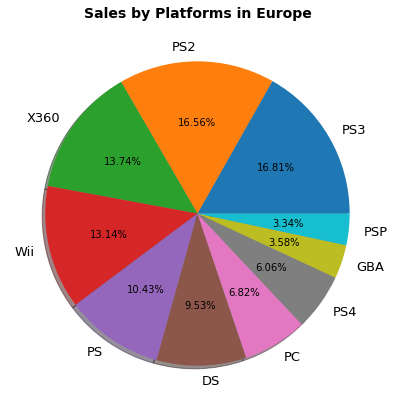

In [ ]:
NA_Sales=[343.23,338.19,280.54,268.33,213.02,194.63,139.38,123.70,73.15,68.25]
labels=['PS3','PS2','X360','Wii','PS','DS','PC','PS4','GBA','PSP']
plt.figure(figsize=(9, 7))
plt.pie(NA_Sales,labels=labels,shadow=True,autopct='%.2f%%')
plt.title('Sales by Platforms in Europe', fontsize=14)
plt.show()

# 2.3.2 Which Genre has performed the best in terms of sales in Europe?

In [81]:
data2 = pd.DataFrame(df.groupby("Genre")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index())
data2.rename(columns = {'Genre':'Genre_EU'}, inplace = True)
data2[0:10]

,Genre_EU,EU_Sales
0,Action,524.92
1,Sports,376.30
2,Shooter,313.24
3,Racing,238.38
4,Misc,213.93
5,Platform,201.13
6,Role-Playing,188.05
7,Simulation,113.20
8,Fighting,100.22
9,Adventure,64.08


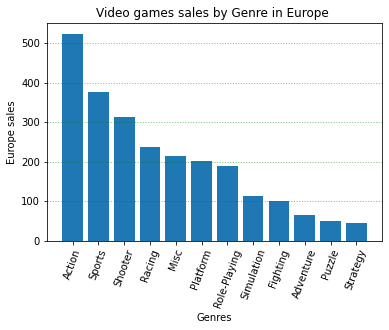

In [83]:
Genre_EU=list(data2['Genre_EU'])
EU_Sales = list(data2['EU_Sales'])
plt.bar(Genre_EU,EU_Sales)
plt.grid(color='green', linestyle=':', linewidth=1.0, axis='y', alpha=0.5)
plt.xticks(rotation=70) 
plt.ylabel('Europe sales')  
plt.xlabel('Genres')           
plt.title('Video games sales by Genre in Europe ')
plt.show()

## 2.4.1 Which Platform has performed the best in terms of sales in Japan?

In [45]:
data3 = pd.DataFrame(df.groupby("Platform")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index())
data3.rename(columns = {'Platform':'Platform_JP'}, inplace = True)
data3[0:10]

,Platform_JP,JP_Sales
0,DS,175.34
1,PS,139.78
2,PS2,139.20
3,SNES,116.55
4,NES,98.65
5,3DS,97.33
6,GB,85.12
7,PS3,79.92
8,PSP,76.67
9,Wii,69.21


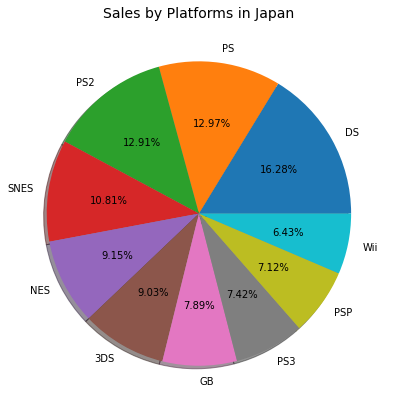

In [ ]:
plt.figure(figsize=(9, 7))
plt.pie(list(data3['JP_Sales'][0:10]),labels=list(data3['Platform_JP'][0:10]),shadow=True,autopct='%.2f%%')
plt.title('Sales by Platforms in Japan', fontsize=14)
plt.show()

# 2.4.2 Which Genre has performed the best in terms of sales in Japan?

In [84]:
data4 = pd.DataFrame(df.groupby("Genre")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index())
data4.rename(columns = {'Genre':'Genre_JP'}, inplace = True)
data4[0:10]

,Genre_JP,JP_Sales
0,Role-Playing,352.26
1,Action,159.49
2,Sports,135.25
3,Platform,130.77
4,Misc,107.72
5,Fighting,87.35
6,Simulation,63.64
7,Puzzle,57.31
8,Racing,56.69
9,Adventure,51.99


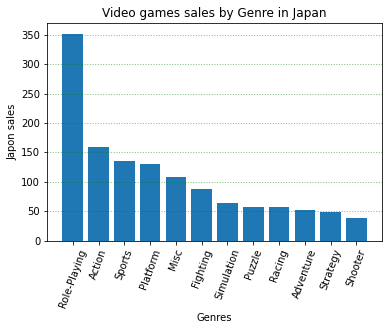

In [85]:
Genre_JP=list(data4['Genre_JP'])
JP_Sales = list(data4['JP_Sales'])
plt.bar(Genre_JP,JP_Sales)
plt.grid(color='green', linestyle=':', linewidth=1.0, axis='y', alpha=0.5)
plt.xticks(rotation=70) 
plt.ylabel('Japon sales')  
plt.xlabel('Genres')           
plt.title('Video games sales by Genre in Japan')
plt.show()